In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
#Splitting data set into columns and stripping apostrophes on the entries.
df = pd.read_csv(r'C:\Users\nezih\Desktop\bankdata\bank-full.csv',sep = "?")
quotes_strip = list(df.columns)[0].replace('"','')
columns_split = quotes_strip.split(';')
columns_split
df = df[df.iloc[:,0].name].str.split(pat = ';',expand = True)
df.columns =  columns_split
df.replace('"','',regex = True,inplace = True)

In [13]:
null_sum = [df[column].isnull().sum() for column in list(df.columns.values)]
null_sum_dict = dict(zip(list(df.columns.values),null_sum))
null_sum_dict
#There is no null value.

{'age': 0,
 'job': 0,
 'marital': 0,
 'education': 0,
 'default': 0,
 'balance': 0,
 'housing': 0,
 'loan': 0,
 'contact': 0,
 'day': 0,
 'month': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 0,
 'previous': 0,
 'poutcome': 0,
 'y': 0}

# EDA

In [14]:
df.describe()
#Average customer features can be observed in "top" row.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no
freq,2085,9732,27214,23202,44396,3514,25130,37967,29285,2752,13766,188,17544,36954,36954,36959,39922


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


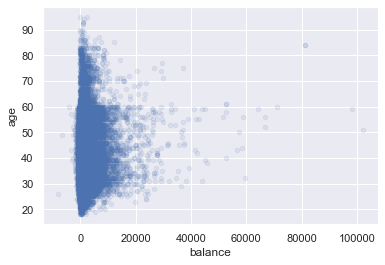

In [15]:
df.balance = df.balance.astype('int')
df.age = df.age.astype('int')
df.plot(x = 'balance',y = 'age',kind = 'scatter',alpha = 0.1)
#Ages between 30 and 60 have the most balances.

{'whiskers': [<matplotlib.lines.Line2D at 0x2533aec3848>,
 'caps': [<matplotlib.lines.Line2D at 0x2533aec2ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2533aec4c08>],
 'medians': [<matplotlib.lines.Line2D at 0x2533aec1b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2533aec06c8>],
 'means': []}

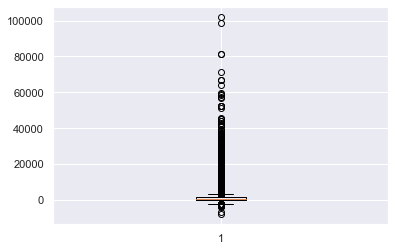

In [16]:
plt.boxplot(df.balance)
#There are lots of values that are above the mean.

{'whiskers': [<matplotlib.lines.Line2D at 0x2533aea57c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2533aea4448>,
 'boxes': [<matplotlib.lines.Line2D at 0x2533aea6408>],
 'medians': [<matplotlib.lines.Line2D at 0x2533aea32c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2533aea1b08>],
 'means': []}

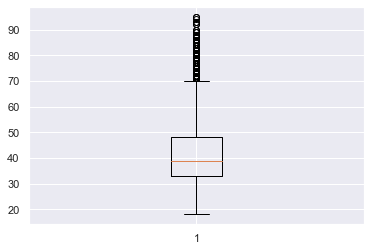

In [17]:
plt.boxplot(df.age)
#Median customer age is around 40.

In [19]:
import re

def convert_categorical(df):
    categorical_features = []
    letter_pattern = re.compile(r'[A-z]')
    #If values types are all str or int,it is impossible to distinguish them with this method,so i prefer to do it with regex.
    for column in df.columns.values:
        try:
            if letter_pattern.match(str(df[column].values[0])):
                df[column] = pd.Categorical(df[column])
                categorical_features.append(df[column].name)
        
        except TypeError as e :
                print(e)
        else:
            if letter_pattern.match(str(df[column].values[0])):
                df[column] = pd.Categorical(df[column])
                categorical_features.append(df[column].name)
        
    return set(categorical_features)


In [42]:
feature_list = list(df.columns.values)

def groupby_method(groupby_features,method):
        series_groupby = df[groupby_features].groupby(df[groupby_features].iloc[:,-1].name)
        if method == 'sum':
            return series_groupby.sum()
        elif method == 'mean':
            return series_groupby.mean()
    
def groupby_bar(groupby_df,bar_feature='balance'):
    plt.figure(figsize = (15,5))
    plt.bar(groupby_df.index.values,groupby_df[bar_feature],label = bar_feature)
    plt.ylabel('$',rotation = 0)
    plt.xlabel(groupby_df.index.name)
    plt.legend(prop={'size': 20})

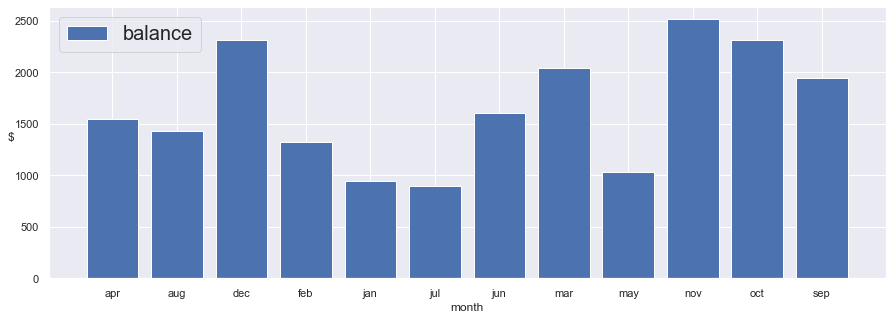

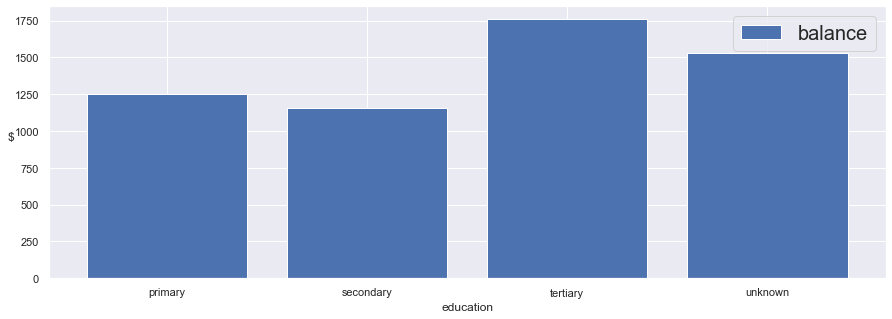

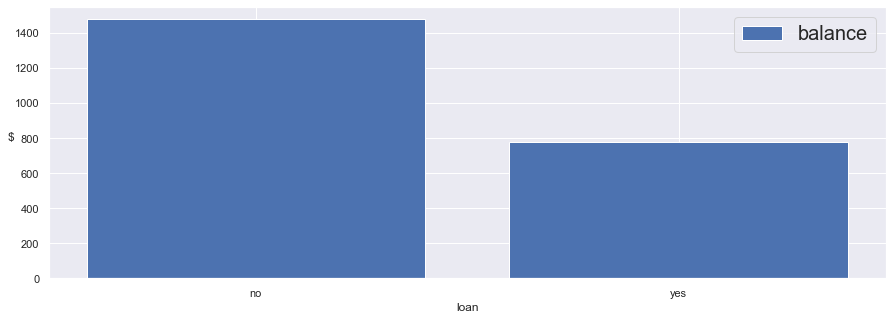

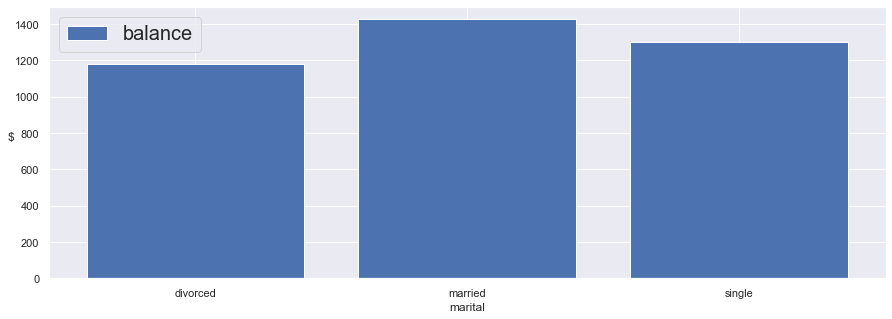

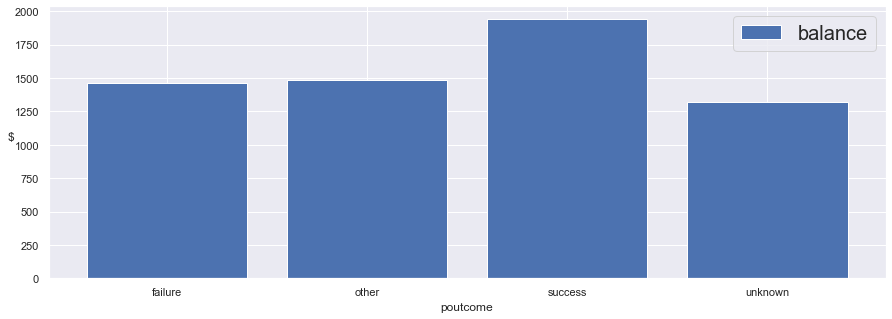

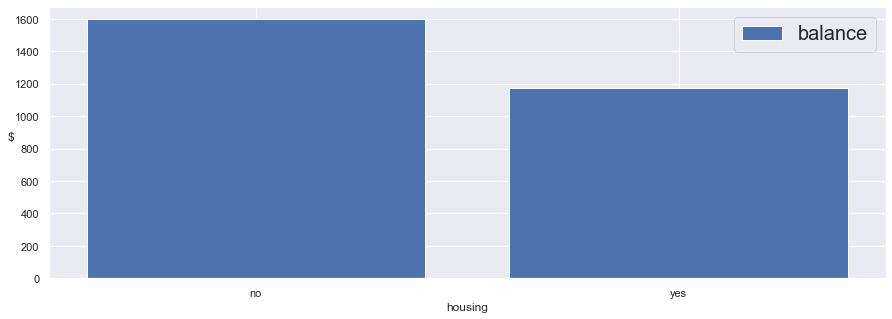

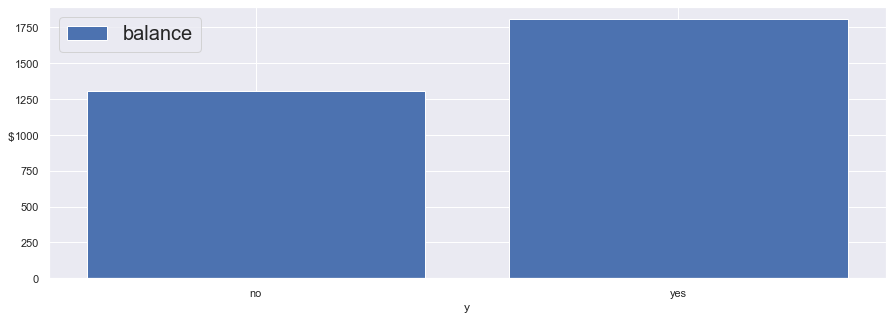

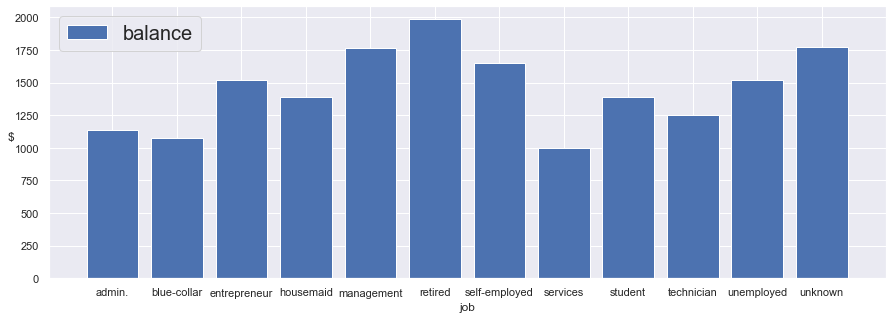

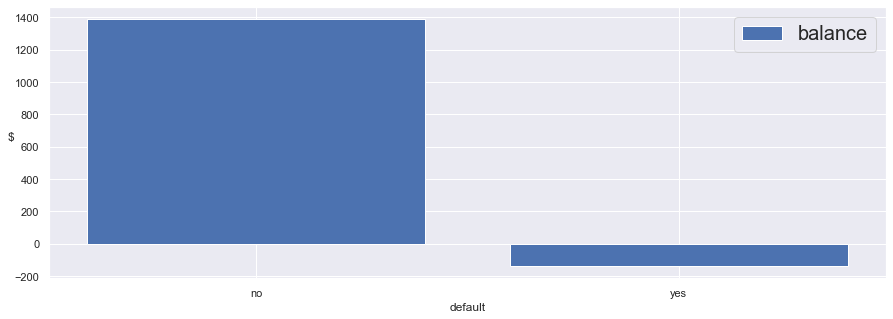

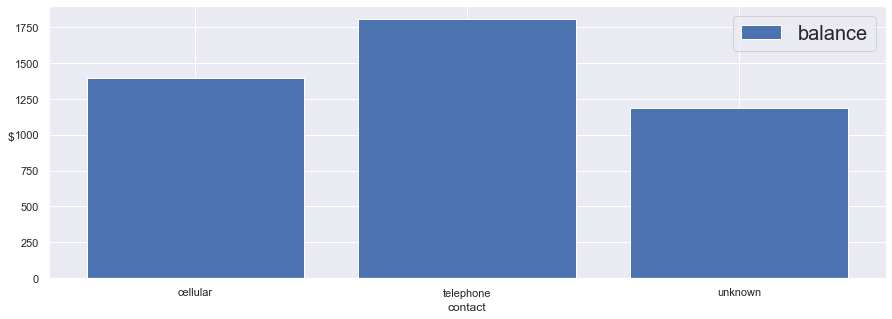

In [43]:
categorical_features = list(convert_categorical(df))
numerical_features = [name for name in feature_list if name not in categorical_features]

#unless numerical features are converted into int,it won't group them by categorical ones.
for feature in numerical_features:
    df[feature] = df[feature].astype('int')
    
groupby_lists = []
for groupby_name in categorical_features:
    groupby_list = numerical_features[:]
    groupby_list.append(groupby_name)
    groupby_lists.append(groupby_list)

for feature_list in groupby_lists:
        groupby_bar(groupby_method(feature_list,'mean'))